In [1]:
#import necessary packages 

import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix ,precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.svm import SVC
from sklearn import datasets

In [2]:
#Read the file and loading into the code
df = pd.read_csv('G:/CS/4th/data_science/data - Copy.csv')
#View the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#replacing the missing values in compactness_mean by mean value
df["compactness_mean"] = df["compactness_mean"].replace(np.NaN, df["compactness_mean"].mean())
print(df["compactness_mean"][:10])

df["Unnamed: 32"] = df["Unnamed: 32"].replace(np.NaN, 1)
print(df["Unnamed: 32"][:10])

df["compactness_worst"] = df["compactness_worst"].replace(np.NaN, df["compactness_worst"].mean())
print(df["compactness_worst"][:10])

df["concavity_worst"] = df["concavity_worst"].replace(np.NaN, df["concavity_worst"].mean())
print(df["concavity_worst"][:10])

0    0.27760
1    0.07864
2    0.15990
3    0.28390
4    0.13280
5    0.17000
6    0.10900
7    0.16450
8    0.19320
9    0.23960
Name: compactness_mean, dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: Unnamed: 32, dtype: float64
0    0.6656
1    0.1866
2    0.4245
3    0.8663
4    0.2050
5    0.5249
6    0.2576
7    0.3682
8    0.5401
9    1.0580
Name: compactness_worst, dtype: float64
0    0.7119
1    0.2416
2    0.4504
3    0.6869
4    0.4000
5    0.5355
6    0.3784
7    0.2678
8    0.5390
9    1.1050
Name: concavity_worst, dtype: float64


In [4]:
# Calculate the minimum, maximum, mean, variance, and standard deviation for each column
statistics = df.describe().transpose()[['min', 'max', 'mean', 'std']]

In [5]:
# Display skewness and kurtosis
statistics['skewness'] = df.skew(numeric_only=True)  
statistics['kurtosis'] = df.kurt(numeric_only=True) 

# skewness along the index axis 
statistics.skew(axis = 0, skipna = True) 

min         5.650361
max         5.656854
mean        5.656854
std         5.656854
skewness    1.679830
kurtosis    2.156031
dtype: float64

In [6]:
variances = df.var(numeric_only=True)
# Display the variances
print("Variances:")
print(variances)

Variances:
id                         1.563015e+16
radius_mean                1.241892e+01
texture_mean               1.849891e+01
perimeter_mean             5.904405e+02
area_mean                  1.238436e+05
smoothness_mean            1.977997e-04
compactness_mean           2.789187e-03
concavity_mean             6.355248e-03
concave points_mean        1.505661e-03
symmetry_mean              7.515428e-04
fractal_dimension_mean     4.984872e-05
radius_se                  7.690235e-02
texture_se                 3.043159e-01
perimeter_se               4.087896e+00
area_se                    2.069432e+03
smoothness_se              9.015114e-06
compactness_se             3.207029e-04
concavity_se               9.111982e-04
concave points_se          3.807242e-05
symmetry_se                6.833290e-05
fractal_dimension_se       7.001692e-06
radius_worst               2.336022e+01
texture_worst              3.777648e+01
perimeter_worst            1.129131e+03
area_worst                 3.

In [7]:
# find skewness in each row 
statistics.skew(axis = 1, skipna = True) 

id                         2.356449
radius_mean                1.461854
texture_mean               1.459166
perimeter_mean             1.451721
area_mean                  2.108950
smoothness_mean            1.461338
compactness_mean           1.044946
concavity_mean             1.059246
concave points_mean        0.919031
symmetry_mean              1.355980
fractal_dimension_mean     1.720621
radius_se                  2.244267
texture_se                 0.803979
perimeter_se               0.934215
area_se                    2.402940
smoothness_se              2.210579
compactness_se             1.864483
concavity_se               2.394442
concave points_se          2.081602
symmetry_se                2.090878
fractal_dimension_se       2.335763
radius_worst               1.623472
texture_worst              1.368820
perimeter_worst            1.644776
area_worst                 2.216606
smoothness_worst           0.630214
compactness_worst          1.310259
concavity_worst            0

0    0.14710
1    0.07017
2    0.12790
3    0.10520
4    0.10430
5    0.08089
6    0.07400
7    0.05985
8    0.09353
9    0.08543
Name: concave points_mean, dtype: float64


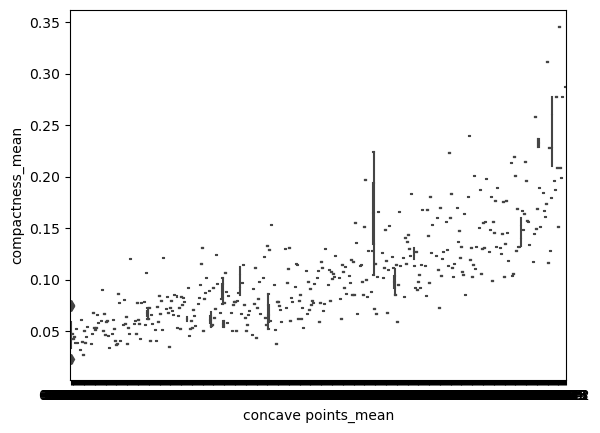

In [8]:
#replacing the missing values in concave points_mean by mean value
df["concave points_mean"] = df["concave points_mean"].replace(np.NaN, df["concave points_mean"].mean())
print(df["concave points_mean"][:10])

#knowing number of duplicate
df.duplicated().sum()

#delete the duplication
df.drop_duplicates(inplace=True)
df.duplicated().sum()

#drawing a boxplot to detect outliers of concave points_mean
sns.boxplot(x=df['concave points_mean'],y=df["compactness_mean"])
plt.show()

C:\Users\mcc\AppData\Local\Temp\ipykernel_14020\247714589.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x ='radius_mean',


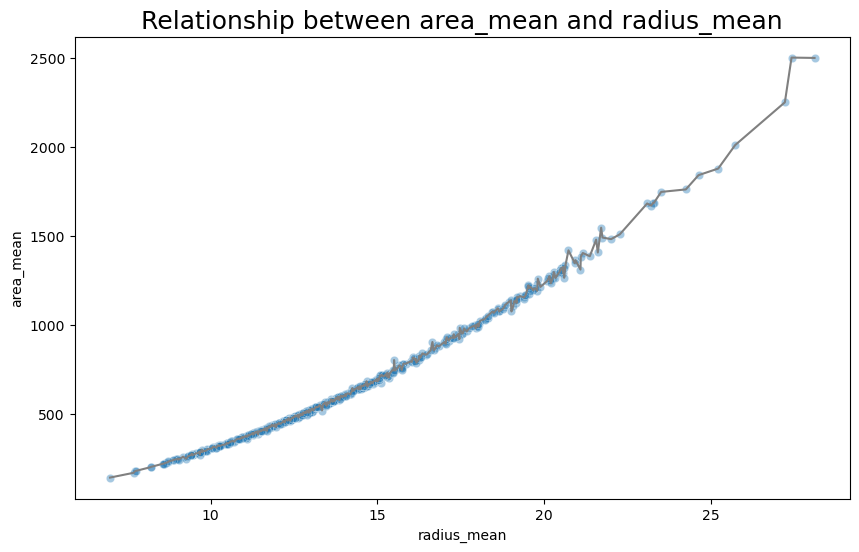

In [9]:
plt.figure(figsize=(10, 6))#Scatter plot for relation between radius_mean and area_mean
ax = sns.scatterplot(x ='radius_mean',
                    y = df['area_mean'],
                    data = df,
                     palette = ["green", "red", "coral", "blue"],
                     legend="full",
                     alpha = 0.4
                    )
max_pressure = df.groupby("radius_mean")["area_mean"].max() #Making a line plot of max ages 
sns.lineplot(data = max_pressure, ax = ax.axes, color="grey")
plt.xlabel("radius_mean")
plt.ylabel("area_mean")
plt.title("Relationship between area_mean and radius_mean", fontsize = 18)
plt.show()

In [10]:
# Load dataset from sklearn
bc = datasets.load_breast_cancer()
# For easy of manipulation, convert dataset to pandas dataframe
bcdf = pd.DataFrame(bc.data, columns= bc.feature_names)

In [11]:
# For easy of manipulation, convert dataset to pandas dataframe
bcdf = pd.DataFrame(bc.data, columns= bc.feature_names)

In [12]:
# Append dataframe containing tumor features with diagnostic outcomes.
# This labels will be used for supervised learning.
bcdf['Diagnosis'] = bc.target

In [13]:
# For differential diagnosis visual comparisons.
# create to dataframes - one for positive, one for negative

bcdf_n = bcdf[bcdf['Diagnosis'] == 0]
bcdf_y = bcdf[bcdf['Diagnosis'] == 1]

# Create list of features related to mean tumor characteristics
features_means =list(bcdf.columns[0:10])

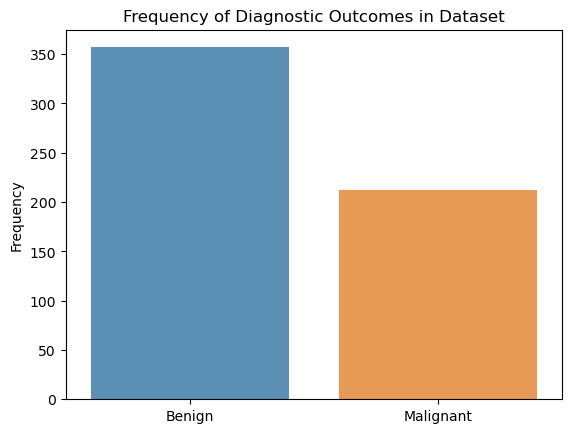

In [14]:
# Visualize frequency of diagnoses in dataset
outcome_count = bcdf.Diagnosis.value_counts()
outcome_count = pd.Series(outcome_count)
outcome_count = pd.DataFrame(outcome_count)
outcome_count.index = ['Benign', 'Malignant']

sns.barplot(x = ['Benign', 'Malignant'], y = 'Diagnosis', data = outcome_count, alpha = .8)
plt.title('Frequency of Diagnostic Outcomes in Dataset')
plt.ylabel('Frequency')
plt.show()

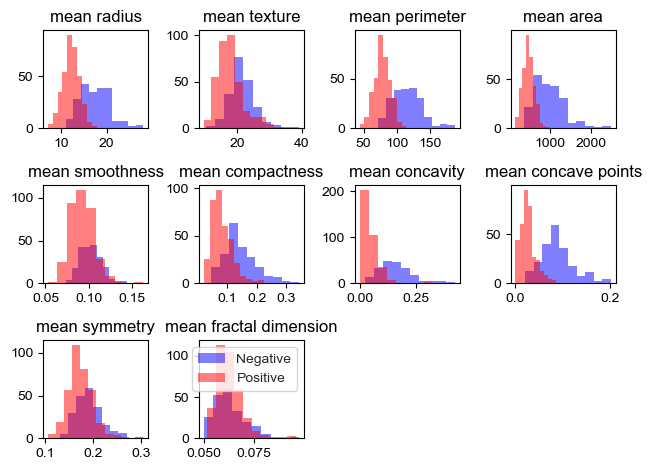

In [15]:
# Visualize tumor characteristics for positive and negatives diagnoses 


# Instantiate figure object
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[0:10])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for comparisons.
    ax.hist(bcdf_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'b')
    ax.hist(bcdf_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


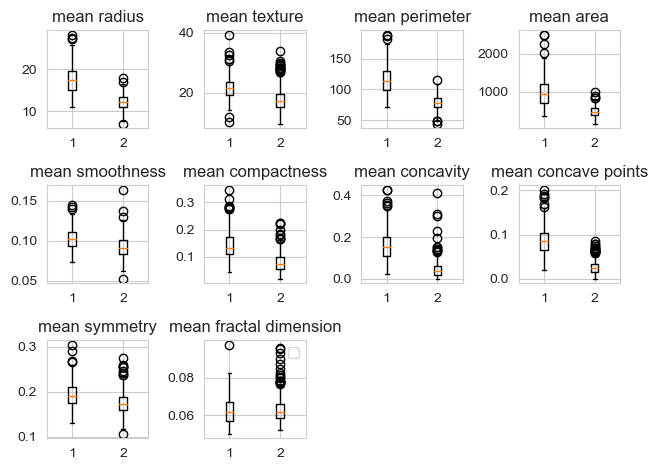

In [16]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[0:10])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.boxplot([bcdf_n[b], bcdf_y[b]])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

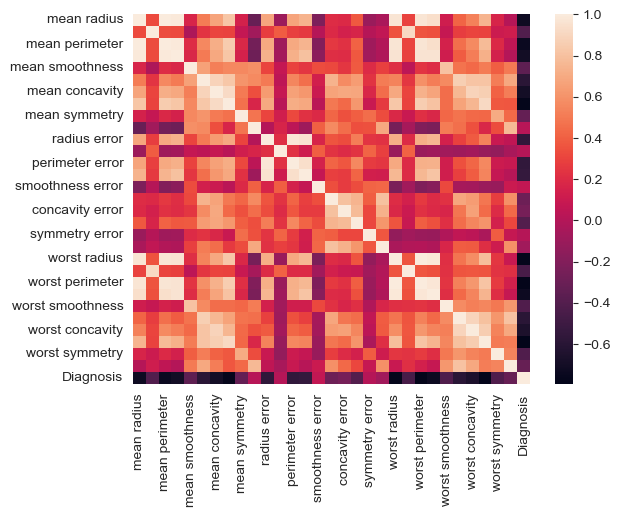

In [17]:
# Quick visualization of relationships between features and diagnoses

sns.heatmap(bcdf.corr())
sns.set_style("whitegrid")
plt.show()

In [19]:
import numpy as np
import scipy.stats as stats

# Extract 'radius_mean' data
radius_mean_data = df['radius_mean']

# Given information
sample_mean = radius_mean_data.mean()
population_mean = 100
population_std = radius_mean_data.std()
sample_size = len(radius_mean_data)
alpha = 0.05

# Compute the z-score
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
print('Z-Score:', z_score)

# Critical Z-Score
z_critical = stats.norm.ppf(1 - alpha / 2)  # two-tailed test
print('Critical Z-Score:', z_critical)

# Hypothesis testing
if np.abs(z_score) > z_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

# P-Value
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))  # two-tailed test
print('p-value:', p_value)

# Hypothesis testing using p-value
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")
# there is a significant difference 

Z-Score: -581.2585793739637
Critical Z-Score: 1.959963984540054
Reject Null Hypothesis
p-value: 0.0
Reject Null Hypothesis


In [20]:
from sklearn.decomposition import PCA

# Separate features and labels
X = df.drop(['diagnosis'], axis=1)

# Apply Principal Component Analysis (PCA)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Display the reduced features
df_pca = pd.DataFrame(data=X_pca, columns=['PCA_Component'])
print(df_pca.head())

   PCA_Component
0  -2.952953e+07
1  -2.952931e+07
2   5.392907e+07
3   5.397647e+07
4   5.398657e+07


In [21]:
X_train, X_test, y_train, y_test = train_test_split(bcdf.iloc[:,:-1], bcdf['Diagnosis'], train_size = .8 )
lda_m= LDA()
lda = lda_m.fit(X_train,y_train)
lda_predictions=lda.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, lda_predictions),'%'))

Accuracy score:  96.491228%


In [22]:
# Split data into testing and training set. Use 80% for training
X_train, X_test, y_train, y_test = train_test_split(bcdf.iloc[:,:-1], bcdf['Diagnosis'], train_size = .8 )

In [23]:
print(X_train.shape[0])
print(X_test.shape[0])

455
114


In [24]:
# Applying naive Bayes
NBclassifier = GaussianNB()

# Train the model:
NBmodel = NBclassifier.fit(X_train, y_train)

# Making predictions by using pred() function:
NBpreds = NBclassifier.predict(X_test)
print("The predictions are:\n", NBpreds[:15])

# Finding accuracy of our Naive Bayes classifier:
from sklearn.metrics import accuracy_score
print("Accuracy of our classifier is:", accuracy_score(y_test, NBpreds) *100)

The predictions are:
 [0 1 1 0 1 1 0 0 0 0 1 0 1 1 0]
Accuracy of our classifier is: 92.98245614035088


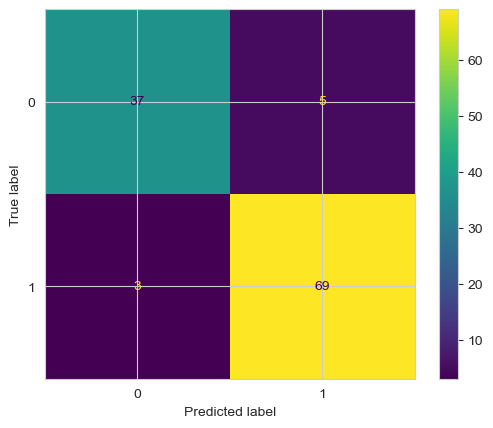

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, NBpreds)
plt.show()

In [26]:
print('Precision score: ', format(precision_score(y_test, NBpreds)))
print('Recall score: ', format(recall_score(y_test, NBpreds)))
print('F1 score: ', format(f1_score(y_test, NBpreds)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test, NBpreds)))
error_rate = 1 - accuracy_score(y_test, NBpreds)
print('Error rate: ', format(error_rate))

Precision score:  0.9324324324324325
Recall score:  0.9583333333333334
F1 score:  0.9452054794520548

 Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        42
           1       0.93      0.96      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Error rate:  0.07017543859649122


In [27]:
from sklearn.model_selection import cross_val_score
# Create Decision Tree classifier with entropy criterion and initial ccp_alpha
dt = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
dt_predictions = dt.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, dt_predictions)
print('Accuracy score: {:.2%}'.format(accuracy))

# Error estimation with cross-validated pruning
ccp_alphas, accuracies = [], []

# Iterate over different values of ccp_alpha and calculate cross-validated accuracy
for ccp_alpha in np.linspace(0, 0.1, 10):
    dt = DecisionTreeClassifier(criterion='entropy', ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt, X_train, y_train, cv=5)  # 5-fold cross-validation
    ccp_alphas.append(ccp_alpha)
    accuracies.append(scores.mean())

# Find the optimal ccp_alpha that maximizes cross-validated accuracy
optimal_ccp_alpha = ccp_alphas[accuracies.index(max(accuracies))]

# Refit the model with the optimal ccp_alpha
dt_optimal = DecisionTreeClassifier(criterion='entropy', ccp_alpha=optimal_ccp_alpha)
dt_optimal.fit(X_train, y_train)

# Make predictions on the test data using the pruned tree
dt_optimal_predictions = dt_optimal.predict(X_test)

# Calculate accuracy with the pruned tree
accuracy_pruned = accuracy_score(y_test, dt_optimal_predictions)
print('Pruned Tree Accuracy score: {:.2%}'.format(accuracy_pruned))
print('Optimal ccp_alpha: {:.5f}'.format(optimal_ccp_alpha))


Accuracy score: 92.98%
Pruned Tree Accuracy score: 90.35%
Optimal ccp_alpha: 0.03333


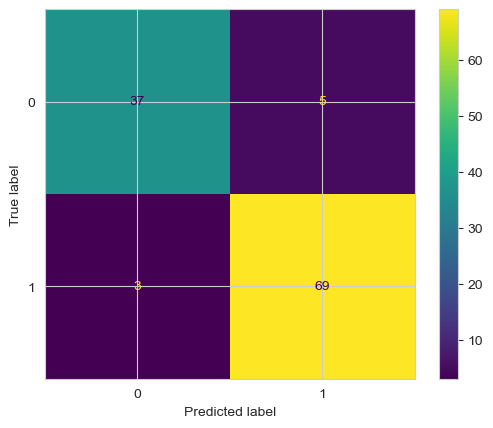

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_predictions)
plt.show()

In [29]:
print('Precision score: ', format(precision_score(y_test, dt_predictions)))
print('Recall score: ', format(recall_score(y_test, dt_predictions)))
print('F1 score: ', format(f1_score(y_test, dt_predictions)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test, dt_predictions)))
error_rate = 1 - accuracy_score(y_test, dt_predictions)
print('Error rate: ', format(error_rate))

Precision score:  0.9324324324324325
Recall score:  0.9583333333333334
F1 score:  0.9452054794520548

 Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        42
           1       0.93      0.96      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Error rate:  0.07017543859649122


In [30]:
# Create the DecisionTreeClassifier with gini criterion and ccp_alpha
gini = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015)

# Fit the model
gini.fit(X_train, y_train)

# Make predictions on the test set
gini_predictions = gini.predict(X_test)

# Print the accuracy score
accuracy = accuracy_score(y_test, gini_predictions)
print('Accuracy score:', format(accuracy, '%'))

Accuracy score: 92.982456%


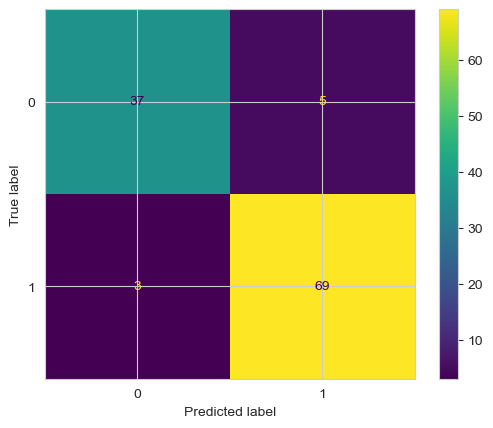

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, gini_predictions)
plt.show()

In [32]:
print('Precision score: ', format(precision_score(y_test,  gini_predictions)))
print('Recall score: ', format(recall_score(y_test,  gini_predictions)))
print('F1 score: ', format(f1_score(y_test,  gini_predictions)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test,  gini_predictions)))
error_rate = 1 - accuracy_score(y_test, gini_predictions)
print('Error rate: ', format(error_rate))

Precision score:  0.9324324324324325
Recall score:  0.9583333333333334
F1 score:  0.9452054794520548

 Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        42
           1       0.93      0.96      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Error rate:  0.07017543859649122


In [33]:
lda_m= LDA()
lda = lda_m.fit(X_train,y_train)
lda_predictions=lda.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, lda_predictions),'%'))

Accuracy score:  94.736842%


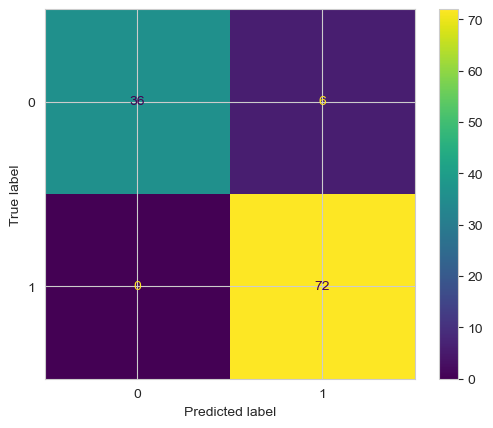

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, lda_predictions)
plt.show()

In [35]:
print('Precision score: ', format(precision_score(y_test, lda_predictions)))
print('Recall score: ', format(recall_score(y_test,  lda_predictions)))
print('F1 score: ', format(f1_score(y_test, lda_predictions)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test, lda_predictions)))
error_rate = 1 - accuracy_score(y_test, lda_predictions)
print('Error rate: ', format(error_rate))

Precision score:  0.9230769230769231
Recall score:  1.0
F1 score:  0.9600000000000001

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        42
           1       0.92      1.00      0.96        72

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Error rate:  0.052631578947368474


In [36]:
log_m = LogisticRegression(max_iter=30)
log= log_m.fit(X_train,y_train)
log_predictions=log.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, log_predictions),'%'))


Accuracy score:  91.228070%


C:\Users\mcc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


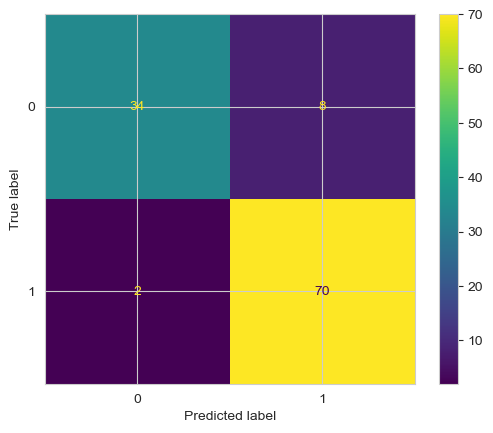

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, log_predictions)
plt.show()

In [38]:
print('Precision score: ', format(precision_score(y_test,  log_predictions)))
print('Recall score: ', format(recall_score(y_test,  log_predictions)))
print('F1 score: ', format(f1_score(y_test, log_predictions)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test, log_predictions)))
error_rate = 1 - accuracy_score(y_test, log_predictions)
print('Error rate: ', format(error_rate))

Precision score:  0.8974358974358975
Recall score:  0.9722222222222222
F1 score:  0.9333333333333333

 Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.81      0.87        42
           1       0.90      0.97      0.93        72

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

Error rate:  0.08771929824561409


In [39]:
# Euclidean distance
knn_m_euclidean = KNeighborsClassifier(n_neighbors=97)
knn_m_euclidean.fit(X_train, y_train)
knn_predictions_euclidean = knn_m_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, knn_predictions_euclidean)
print('Accuracy score (Euclidean): {:.2%}'.format(accuracy_euclidean))

# Manhattan distance
knn_m_manhattan = KNeighborsClassifier(n_neighbors=97, metric='manhattan')
knn_m_manhattan.fit(X_train, y_train)
knn_predictions_manhattan = knn_m_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, knn_predictions_manhattan)
print('Accuracy score (Manhattan): {:.2%}'.format(accuracy_manhattan))

# Minkowski distance (generalization of Euclidean and Manhattan)
knn_m_minkowski = KNeighborsClassifier(n_neighbors=97, metric='minkowski', p=3)  # p=2 for Euclidean, p=1 for Manhattan
knn_m_minkowski.fit(X_train, y_train)
knn_predictions_minkowski = knn_m_minkowski.predict(X_test)
accuracy_minkowski = accuracy_score(y_test, knn_predictions_minkowski)
print('Accuracy score (Minkowski): {:.2%}'.format(accuracy_minkowski))

Accuracy score (Euclidean): 89.47%
Accuracy score (Manhattan): 89.47%
Accuracy score (Minkowski): 88.60%


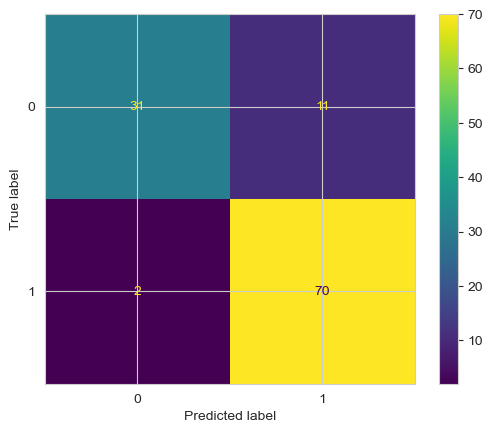

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions_minkowski)
plt.show()

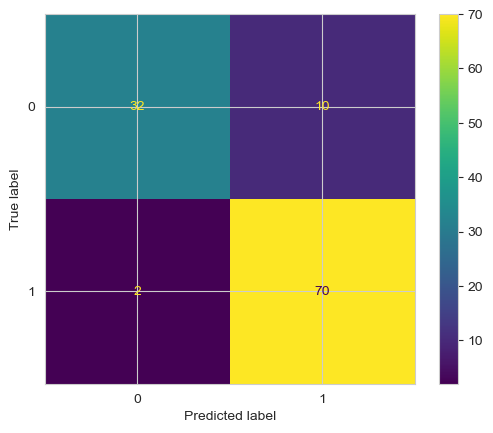

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions_manhattan)
plt.show()

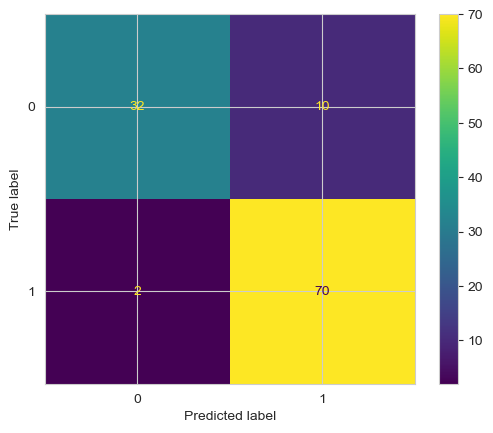

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions_euclidean)
plt.show()

In [43]:
print('Precision score: ', format(precision_score(y_test, knn_predictions_euclidean)))
print('Recall score: ', format(recall_score(y_test, knn_predictions_euclidean)))
print('F1 score: ', format(f1_score(y_test, knn_predictions_euclidean)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test, knn_predictions_euclidean)))
error_rate = 1 - accuracy_score(y_test, knn_predictions_euclidean)
print('Error rate: ', format(error_rate))

Precision score:  0.875
Recall score:  0.9722222222222222
F1 score:  0.9210526315789473

 Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.76      0.84        42
           1       0.88      0.97      0.92        72

    accuracy                           0.89       114
   macro avg       0.91      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114

Error rate:  0.10526315789473684


In [44]:
print('Precision score: ', format(precision_score(y_test, knn_predictions_manhattan)))
print('Recall score: ', format(recall_score(y_test, knn_predictions_manhattan)))
print('F1 score: ', format(f1_score(y_test, knn_predictions_manhattan)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test, knn_predictions_manhattan)))
error_rate = 1 - accuracy_score(y_test, knn_predictions_euclidean)
print('Error rate: ', format(error_rate))

Precision score:  0.875
Recall score:  0.9722222222222222
F1 score:  0.9210526315789473

 Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.76      0.84        42
           1       0.88      0.97      0.92        72

    accuracy                           0.89       114
   macro avg       0.91      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114

Error rate:  0.10526315789473684


In [45]:
print('Precision score: ', format(precision_score(y_test, knn_predictions_minkowski)))
print('Recall score: ', format(recall_score(y_test, knn_predictions_minkowski)))
print('F1 score: ', format(f1_score(y_test, knn_predictions_minkowski)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test, knn_predictions_minkowski)))
error_rate = 1 - accuracy_score(y_test, knn_predictions_minkowski)
print('Error rate: ', format(error_rate))

Precision score:  0.8641975308641975
Recall score:  0.9722222222222222
F1 score:  0.9150326797385621

 Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.74      0.83        42
           1       0.86      0.97      0.92        72

    accuracy                           0.89       114
   macro avg       0.90      0.86      0.87       114
weighted avg       0.89      0.89      0.88       114

Error rate:  0.11403508771929827


In [46]:
neural_m = MLPClassifier(alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
neural_m.fit(X_train, y_train)
neural_predictions =neural_m.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, neural_predictions),'%'))

Accuracy score:  85.087719%


C:\Users\mcc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


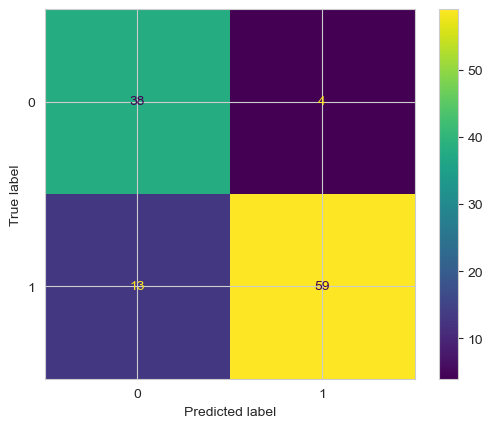

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, neural_predictions)
plt.show()

In [48]:
print('Precision score: ', format(precision_score(y_test, neural_predictions)))
print('Recall score: ', format(recall_score(y_test, neural_predictions)))
print('F1 score: ', format(f1_score(y_test,neural_predictions)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test, neural_predictions)))
error_rate = 1 - accuracy_score(y_test, neural_predictions)
print('Error rate: ', format(error_rate))

Precision score:  0.9365079365079365
Recall score:  0.8194444444444444
F1 score:  0.874074074074074

 Classification report: 
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        42
           1       0.94      0.82      0.87        72

    accuracy                           0.85       114
   macro avg       0.84      0.86      0.85       114
weighted avg       0.87      0.85      0.85       114

Error rate:  0.14912280701754388


In [49]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encode the 'diagnosis' column to numeric values
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Separate features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Create a logistic regression model
model = LogisticRegression()

# Perform 3-fold cross-validation
k_folds = 3  # Set the number of folds to 3
cross_val_results = cross_val_score(model, X_train, y_train, cv=k_folds, scoring='accuracy')

# Calculate average accuracy
average_accuracy = cross_val_results.mean()

# Print the results
print(f'3-Fold Cross-Validation Results (K={k_folds}):')
print(f'Individual Fold Accuracies: {cross_val_results}')
print(f'Average Accuracy: {average_accuracy}')

# Fit the model on the entire training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy on Test Set: {test_accuracy}')

3-Fold Cross-Validation Results (K=3):
Individual Fold Accuracies: [0.625      0.375      0.37086093]
Average Accuracy: 0.456953642384106

Accuracy on Test Set: 0.631578947368421


In [50]:
#Bayesian Belief Network
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination

# Assuming 'df' is your DataFrame
# Select a subset of features for illustration
selected_features = ['radius_mean', 'texture_mean', 'diagnosis']

# Create a Bayesian Network structure
model = BayesianNetwork()
model.add_edges_from([('radius_mean', 'diagnosis'), ('texture_mean', 'diagnosis')])

# Fit the parameters using Bayesian Parameter Estimation
model.fit(df[selected_features], estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=10)

# Perform inference
inference = VariableElimination(model)
result = inference.query(variables=['diagnosis'], evidence={'radius_mean': 17.99, 'texture_mean': 10.38})

print(result)

+--------------+------------------+
| diagnosis    |   phi(diagnosis) |
+==============+==================+
| diagnosis(0) |           0.0000 |
+--------------+------------------+
| diagnosis(1) |           1.0000 |
+--------------+------------------+


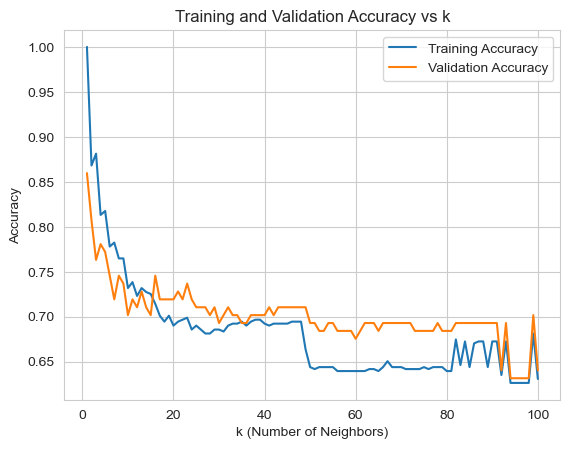

The model is fitting well.


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are defined

# Define a range of k values to experiment with
k_values = range(1, 101)

# Lists to store accuracy for training and validation sets
train_accuracy_values = []
val_accuracy_values = []

# Loop through different k values
for k in k_values:
    # Create and fit the KNeighborsClassifier with the current k value
    knn_m = KNeighborsClassifier(n_neighbors=k)
    knn_m.fit(X_train, y_train)

    # Predictions on the training set
    train_predictions = knn_m.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_accuracy_values.append(train_accuracy)

    # Predictions on the validation set
    val_predictions = knn_m.predict(X_test)
    val_accuracy = accuracy_score(y_test, val_predictions)
    val_accuracy_values.append(val_accuracy)

# Plotting the training and validation accuracy
plt.plot(k_values, train_accuracy_values, label='Training Accuracy')
plt.plot(k_values, val_accuracy_values, label='Validation Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs k')
plt.legend()
plt.show()

# Check for overfitting, underfitting, or fitting well
if max(val_accuracy_values) <= max(train_accuracy_values):
    print("The model is fitting well.")
elif max(val_accuracy_values) < max(train_accuracy_values):
    print("The model may be overfitting.")
else:
    print("The model may be underfitting.")

In [52]:
#Arwa Fawzy 320210071